We begin by loading in and inspecting the dataset

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv('dataset_3.csv')

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the columns of the dataset
print("\nColumns of the dataset:")
print(df.columns)

First few rows of the dataset:
   Unnamed: 0     area  perimeter  physiological_length  physiological_width  \
0           0  65025.0     1020.0                   256                  256   
1           1  65025.0     1020.0                   256                  256   
2           2  65025.0     1020.0                   256                  256   
3           3  65025.0     1020.0                   256                  256   
4           4  65025.0     1020.0                   256                  256   

   aspect_ratio  rectangularity  circularity  major_axis  minor_axis  ...  \
0           1.0        0.992203     0.785398         256         256  ...   
1           1.0        0.992203     0.785398         256         256  ...   
2           1.0        0.992203     0.785398         256         256  ...   
3           1.0        0.992203     0.785398         256         256  ...   
4           1.0        0.992203     0.785398         256         256  ...   

      mean_g     mean_b  

In [4]:
#Remove unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
area                          0
perimeter                     0
physiological_length          0
physiological_width           0
aspect_ratio                  0
rectangularity                0
circularity                   0
major_axis                    0
minor_axis                    0
convex_area                   0
convex_ratio                  0
mean_r                        0
mean_g                        0
mean_b                        0
stddev_r                      0
stddev_g                      0
stddev_b                      0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
classlabel                    0
dtype: int64


In [6]:
# Print unique categories in the 'classlabel' column
unique_categories = df['classlabel'].unique()
print("Unique categories in the 'classlabel' column:")
for category in unique_categories:
    print(category)

Unique categories in the 'classlabel' column:
Bacterial_spot
Late_Blight
Septoria
Spider_mite
yellow_leaf_curl


In [7]:
import numpy as np
# Replace "0" values with NaN
df.replace(0, np.nan, inplace=True)

# Check for missing values after replacing "0" with NaN
missing_values_count = df.isnull().sum()
print("Missing Values Count after replacing '0' with NaN:")
print(missing_values_count)

Missing Values Count after replacing '0' with NaN:
area                            0
perimeter                       0
physiological_length            0
physiological_width             0
aspect_ratio                    0
rectangularity                  0
circularity                     0
major_axis                      0
minor_axis                      0
convex_area                     0
convex_ratio                    0
mean_r                        408
mean_g                        408
mean_b                        408
stddev_r                      408
stddev_g                      408
stddev_b                      408
contrast                      408
correlation                     0
inverse_difference_moments      0
entropy                       408
classlabel                      0
dtype: int64


In [8]:
# Impute missing values in numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Check again for missing values after imputation
print("Missing Values Count after Imputation:")
print(df.isnull().sum())

Missing Values Count after Imputation:
area                          0
perimeter                     0
physiological_length          0
physiological_width           0
aspect_ratio                  0
rectangularity                0
circularity                   0
major_axis                    0
minor_axis                    0
convex_area                   0
convex_ratio                  0
mean_r                        0
mean_g                        0
mean_b                        0
stddev_r                      0
stddev_g                      0
stddev_b                      0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
classlabel                    0
dtype: int64


In [9]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['area', 'perimeter', 'physiological_length', 'physiological_width', 'aspect_ratio', 'rectangularity', 'circularity', 'major_axis', 'minor_axis', 'convex_area', 'convex_ratio', 'mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b', 'contrast', 'correlation', 'inverse_difference_moments', 'entropy']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

We can attempt to run the RandomForest CLassifier now, considering our data is clean. We will one-hot encode the ClassLabel column however.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [11]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('classlabel', axis=1)
y = df['classlabel']

# Applying one-hot encoding to the categorical target variable
y_encoded = pd.get_dummies(y)

In [12]:
# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [13]:
# Apply preprocessing and split the data into training and testing sets
X_preprocessed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.2, random_state=42)

In [14]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rfc = accuracy_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
precision_rfc = precision_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
recall_rfc = recall_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
f1_rfc = f1_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Print metrics
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)

# Model evaluation
print("Classification Report:")
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), target_names=y_encoded.columns))

Accuracy: 0.6233333333333333
Precision: 0.7207123459322039
Recall: 0.6233333333333333
F1 Score: 0.637555647497951
Classification Report:
                  precision    recall  f1-score   support

  Bacterial_spot       0.39      0.83      0.53       310
     Late_Blight       0.86      0.65      0.74       313
        Septoria       0.76      0.42      0.54       293
     Spider_mite       0.77      0.59      0.67       281
yellow_leaf_curl       0.83      0.61      0.71       303

        accuracy                           0.62      1500
       macro avg       0.72      0.62      0.64      1500
    weighted avg       0.72      0.62      0.64      1500



In [15]:
# Initialize and train the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate metrics for KNN
accuracy_knn = accuracy_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1))
precision_knn = precision_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
recall_knn = recall_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
f1_knn = f1_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')

# Print metrics for KNN
print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

# Detailed classification report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), target_names=y_encoded.columns))

K-Nearest Neighbors Metrics:
Accuracy: 0.578
Precision: 0.6253296404104134
Recall: 0.578
F1 Score: 0.5864095998561882

Classification Report for Logistic Regression:
                  precision    recall  f1-score   support

  Bacterial_spot       0.39      0.69      0.50       310
     Late_Blight       0.81      0.60      0.69       313
        Septoria       0.57      0.44      0.50       293
     Spider_mite       0.62      0.54      0.58       281
yellow_leaf_curl       0.72      0.61      0.66       303

        accuracy                           0.58      1500
       macro avg       0.62      0.58      0.59      1500
    weighted avg       0.63      0.58      0.59      1500



In [16]:

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1))
precision_dt = precision_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
recall_dt = recall_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
f1_dt = f1_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')

# Print metrics for Decision Tree
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

# Detailed classification report for Logistic Regression
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), target_names=y_encoded.columns))

Decision Tree Metrics:
Accuracy: 0.5673333333333334
Precision: 0.5731536192231692
Recall: 0.5673333333333334
F1 Score: 0.5689215647222217

Classification Report for Decision Tree:
                  precision    recall  f1-score   support

  Bacterial_spot       0.48      0.56      0.52       310
     Late_Blight       0.70      0.61      0.65       313
        Septoria       0.50      0.48      0.49       293
     Spider_mite       0.59      0.61      0.60       281
yellow_leaf_curl       0.59      0.57      0.58       303

        accuracy                           0.57      1500
       macro avg       0.57      0.57      0.57      1500
    weighted avg       0.57      0.57      0.57      1500



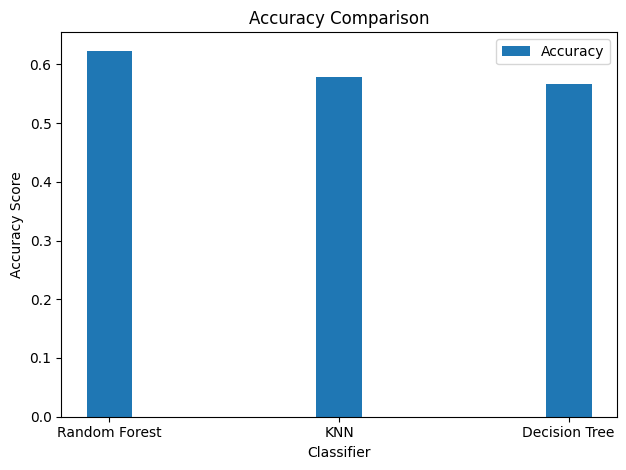

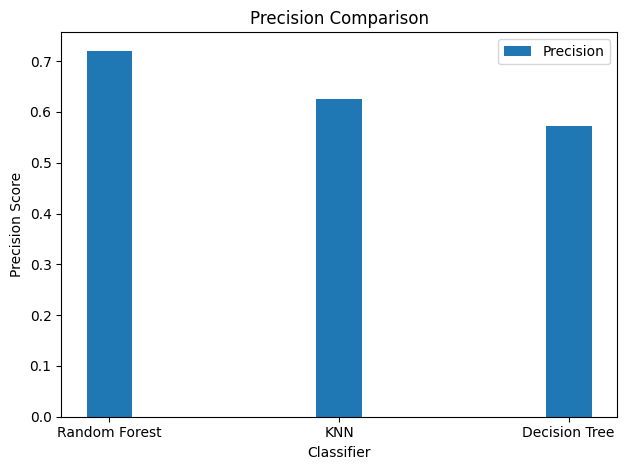

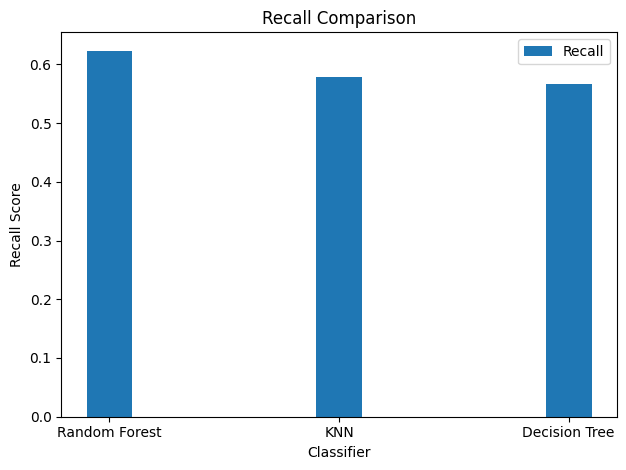

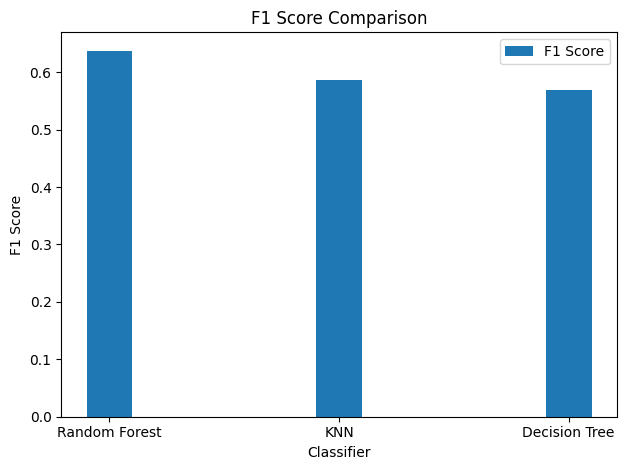

In [17]:
# Store the metrics in lists
classifiers = ['Random Forest', 'KNN', 'Decision Tree']
accuracy_scores = [accuracy_rfc, accuracy_knn, accuracy_dt]
precision_scores = [precision_rfc, precision_knn, precision_dt]
recall_scores = [recall_rfc, recall_knn, recall_dt]
f1_scores = [f1_rfc, f1_knn, f1_dt]

# Plotting the metrics
import matplotlib.pyplot as plt

# Bar width
bar_width = 0.2
index = range(len(classifiers))

# Plotting Accuracy
plt.bar(index, accuracy_scores, width=bar_width, label='Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Precision
plt.bar(index, precision_scores, width=bar_width, label='Precision')
plt.xlabel('Classifier')
plt.ylabel('Precision Score')
plt.title('Precision Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Recall
plt.bar(index, recall_scores, width=bar_width, label='Recall')
plt.xlabel('Classifier')
plt.ylabel('Recall Score')
plt.title('Recall Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting F1 Score
plt.bar(index, f1_scores, width=bar_width, label='F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

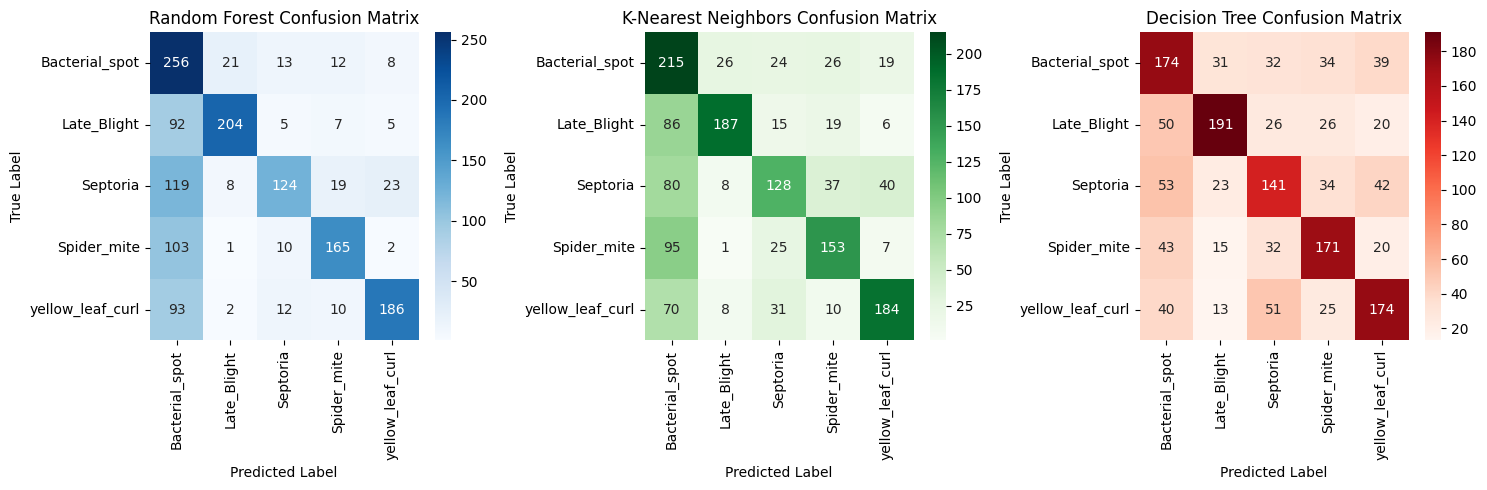

In [18]:
# Calculate confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

# Calculate confusion matrix for K-Nearest Neighbors Classifier
cm_knn = confusion_matrix(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1))

# Calculate confusion matrix for Decision Tree Classifier
cm_dt = confusion_matrix(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1))

# Plotting confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', xticklabels=y_encoded.columns, yticklabels=y_encoded.columns)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(cm_knn, annot=True, cmap='Greens', fmt='d', xticklabels=y_encoded.columns, yticklabels=y_encoded.columns)
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(cm_dt, annot=True, cmap='Reds', fmt='d', xticklabels=y_encoded.columns, yticklabels=y_encoded.columns)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()
